In [18]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [19]:
df=pd.read_csv("/content/IFIC.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)     VOLUME
0  437 2018-05-08         IFIC  11.3  ...  11.4  280.0      10.865   967908.0
1  436 2018-06-08         IFIC  11.0  ...  11.2  305.0      10.966   986650.0
2  435 2018-07-08         IFIC  11.4  ...  11.1  340.0      16.799  1481820.0
3  434 2018-08-08         IFIC  11.2  ...  11.4  480.0      21.930  1936588.0
4  433 2018-09-08         IFIC  11.8  ...  11.3  637.0      21.676  1860179.0

[5 rows x 12 columns]

In [20]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()


#       DATE TRADING CODE  LTP*  ...   YCP  TRADE  VALUE (mn)    VOLUME
36  401 2018-01-10         IFIC  10.9  ...  10.9  188.0       5.272  478227.0
59  378 2018-01-11         IFIC  10.5  ...  10.6  221.0       8.007  759217.0
37  400 2018-02-10         IFIC  11.1  ...  11.0  171.0       4.452  403336.0
79  358 2018-02-12         IFIC  10.4  ...  10.3  123.0       2.755  265026.0
16  421 2018-03-09         IFIC  12.3  ...  12.5  325.0       8.032  649043.0

[5 rows x 12 columns]

In [21]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [22]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [23]:
df['volatility'] = df['volatility']*100

In [24]:
import matplotlib.pyplot as plt 

In [25]:
df=df.reset_index()['volatility']

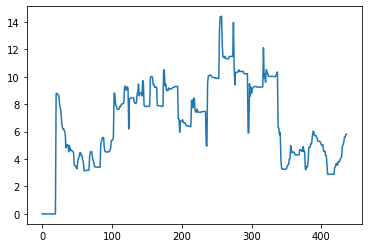

In [26]:
plt.plot(df)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [28]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [29]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:

print(X_train.shape), print(y_train.shape)

(204, 100)
(204,)


(None, None)

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:

X_test.shape


(31, 100, 1)

In [36]:


filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsIfic/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsIfic/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsIfic/model3.h5"


In [34]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 37ms/step - loss: 0.1726 - val_loss: 0.0799
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0284 - val_loss: 0.0191
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0233 - val_loss: 0.0402
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0148 - val_loss: 0.0204
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0142 - val_loss: 0.0361
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0119 - val_loss: 0.0252
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0091 - val_loss: 0.0333
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0095 - val_loss: 0.0509
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0070 - val_loss: 0.0567
Epoch 10/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0081 - val_loss: 0.0354
Epoch 11/100
7/7 [=

In [37]:
model1.save(filepath1)

In [38]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 286ms/step - loss: 0.2939 - val_loss: 0.0837
Epoch 2/100
7/7 [==============================] - 1s 130ms/step - loss: 0.0452 - val_loss: 0.0082
Epoch 3/100
7/7 [==============================] - 1s 129ms/step - loss: 0.0298 - val_loss: 0.0261
Epoch 4/100
7/7 [==============================] - 1s 134ms/step - loss: 0.0111 - val_loss: 0.0444
Epoch 5/100
7/7 [==============================] - 1s 131ms/step - loss: 0.0100 - val_loss: 0.0228
Epoch 6/100
7/7 [==============================] - 1s 134ms/step - loss: 0.0109 - val_loss: 0.0327
Epoch 7/100
7/7 [==============================] - 1s 135ms/step - loss: 0.0097 - val_loss: 0.0364
Epoch 8/100
7/7 [==============================] - 1s 133ms/step - loss: 0.0109 - val_loss: 0.0253
Epoch 9/100
7/7 [==============================] - 1s 133ms/step - loss: 0.0099 - val_loss: 0.0360
Epoch 10/100
7/7 [==============================] - 1s 137ms/step - loss: 0.0110 - val_loss: 0.0291
Epoch 11/

In [39]:
model2.save(filepath2)

In [40]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 13s 527ms/step - loss: 0.1541 - val_loss: 0.0968
Epoch 2/100
7/7 [==============================] - 2s 216ms/step - loss: 0.0174 - val_loss: 0.0476
Epoch 3/100
7/7 [==============================] - 2s 219ms/step - loss: 0.0130 - val_loss: 0.1062
Epoch 4/100
7/7 [==============================] - 2s 217ms/step - loss: 0.0134 - val_loss: 0.0472
Epoch 5/100
7/7 [==============================] - 2s 224ms/step - loss: 0.0126 - val_loss: 0.0691
Epoch 6/100
7/7 [==============================] - 2s 219ms/step - loss: 0.0098 - val_loss: 0.0574
Epoch 7/100
7/7 [==============================] - 2s 217ms/step - loss: 0.0094 - val_loss: 0.0527
Epoch 8/100
7/7 [==============================] - 2s 217ms/step - loss: 0.0075 - val_loss: 0.0499
Epoch 9/100
7/7 [==============================] - 2s 215ms/step - loss: 0.0083 - val_loss: 0.0427
Epoch 10/100
7/7 [==============================] - 2s 216ms/step - loss: 0.0079 - val_loss: 0.0400
Epoch 11

In [41]:
model3.save(filepath3)

In [42]:
from keras.models import load_model

In [43]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsIfic/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [44]:
print(len(all_models))

3


In [45]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsIfic/model1.h5'
model = load_model(f1)


In [46]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [47]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [48]:

#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

3.4925673213577846

In [49]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [50]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [51]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [52]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [53]:

#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat


In [54]:

#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name


In [55]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [56]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [57]:
stacked_model = define_stacked_model(all_models)

In [58]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [59]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [60]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.27234676, 0.28581542, 0.2729305 ],
       [0.2711853 , 0.2843253 , 0.27168435],
       [0.2637296 , 0.28268072, 0.26820502],
       [0.26679084, 0.28064752, 0.26808792],
       [0.2622453 , 0.27732334, 0.26464182],
       [0.26398224, 0.2718944 , 0.26213554],
       [0.26179588, 0.26790604, 0.25911435],
       [0.24896088, 0.2658364 , 0.2535593 ],
       [0.24718037, 0.2635722 , 0.25166035],
       [0.24334884, 0.26214904, 0.24954246],
       [0.24736828, 0.2604795 , 0.24995945],
       [0.26651064, 0.25770527, 0.2548997 ],
       [0.26432824, 0.25699547, 0.2537509 ],
       [0.2462595 , 0.2565817 , 0.24735719],
       [0.25346935, 0.25545222, 0.24916965],
       [0.25952172, 0.2561177 , 0.25161198],
       [0.26577228, 0.25713825, 0.2543245 ],
       [0.26737496, 0.25870073, 0.25576234],
       [0.26611462, 0.26052153, 0.25637195],
       [0.2677363 , 0.2613737 , 0.25741088],
       [0.2681171 , 0.26313105, 0.25854355],
       [0.2711561 , 0.26433626, 0.260267  ],
       [0.

In [61]:
yhat=scaler.inverse_transform(yhat)

In [62]:
x, y, z = yhat.T

In [63]:
avg = (x+y+z)/3

In [64]:
avg = np.reshape(avg,(1, avg.size))
x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [65]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

0.7788562202319359

In [66]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

0.7307490443690701

In [67]:
RMSE = math.sqrt(mean_squared_error(Y_test,y))
RMSE

0.8228366388636518

In [68]:
RMSE = math.sqrt(mean_squared_error(Y_test,z))
RMSE

0.7968708213011365